# Exercises - Risk Metrics

### Data

Try this exercise with data from 
* `../data/risk_etf_data.xlsx`
* `../data/spx_returns_daily.xlsx`

# 1. Risk Metrics of Stocks

### 1.1 Return Moments

Report the moments of the returns. Annualize the mean and volatility.
* mean
* volatility
* skewness
* (excess) kurtosis

Note that the pandas function for kurtosis already reports **excess** kurtosis.

### 1.2 Maximum Drawdown

Report the maximum drawdown for each return series.

If we resampled this data to weekly and recalculated the maximum drawdown, do you think it would be larger or smaller (in magnitude)?

### 1.3 Quantiles

Report the quantiles of the series. Use `.describe()` for a useful summary.

* Report the 5th quantile scaled by standard deviation.
* How much sampling error is in the mean return? Is this likely to cause much sampling error in the quantile estimation?

### 1.4 Comparison

Try repeating 1.1-1.3 for another asset. 

***

# 2. Time Aggregation

Use the price series to calculate **monthly** returns. (You may find `df.resample('M').last()` helpful.

### 2.1 Measuring Covariation Risk

When discussing asset correlation to `SPY`, does it matter whether we examine daily versus monthly returns?
* Report the correlation between each asset and `SPY` for both daily and monthly returns.
* What do you conclude?

If using the "risk etf" data, consider the answer for `BTC`.

### 2.2 Betas

For each series, calculate its beta to `SPY`.
* Estimate the regression with an intercept (alpha) but no need to report it.

How do these betas compare to the daily return betas?

### 2.3 Time Scaling to Higher Moments

Report the skewness and kurtosis for the monthly returns.

How do these compare to the daily skewness and kurtosis measures?

What do you conclude?

***

# <span style="color:red">Solutions</span>

In [ ]:
import pandas as pd
import numpy as np
import datetime

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['font.size'] = 13
plt.rcParams['legend.fontsize'] = 13

from matplotlib.ticker import (MultipleLocator,
                               FormatStrFormatter,
                               AutoMinorLocator)

from cmds.portfolio import *
from cmds.risk import *

## <span style="color:red">1</span>

#### Use SPX stock data

In [ ]:
# DATAPATH = f'../data/spx_returns_daily.xlsx'
# SHEET = 's&p500 rets'

# TICKS = [
#     'AAPL',
#     'META',
#     'NVDA',
#     'TSLA'
# ]

# FREQ = 252

# rets = pd.read_excel(DATAPATH, sheet_name=SHEET).set_index('date')
# ###rets = rets[TICKS]
# rets.dropna(inplace=True)


# bench = pd.read_excel(DATAPATH, sheet_name='benchmark rets').set_index('date')
# rets['SPY'] = bench['SPY']

Use ETF data

In [ ]:
LOADETF = '../data/risk_etf_data.xlsx'
FREQ = 252


px = pd.read_excel(LOADETF,sheet_name='prices').set_index('Date').dropna()
rets = px.pct_change().dropna()

In [ ]:
rets.tail().style.format('{:.1%}').format_index('{:%Y-%m-%d}')

,SPY,VEA,UPRO,GLD,USO,FXE,BTC,HYG,IEF,TIP,SHV
Date,,,,,,,,,,,
2025-06-23,1.0%,0.8%,3.0%,0.3%,-8.1%,0.6%,2.2%,0.2%,0.3%,0.1%,0.0%
2025-06-24,1.1%,1.3%,3.3%,-1.6%,-4.5%,0.3%,0.4%,0.3%,0.3%,0.1%,0.0%
2025-06-25,0.1%,-0.5%,0.2%,0.3%,0.4%,0.4%,1.2%,-0.0%,0.0%,0.1%,0.0%
2025-06-26,0.8%,1.1%,2.3%,-0.1%,0.4%,0.4%,-0.4%,0.3%,0.4%,0.3%,0.0%
2025-06-27,0.5%,0.6%,1.3%,-1.8%,-0.4%,0.0%,0.1%,-0.0%,-0.3%,-0.1%,0.0%


In [ ]:
moments = get_moments(rets,FREQ=FREQ)
moments

,mean,vol,skewness,kurtosis
SPY,15.3%,18.9%,-0.30,14.24
VEA,9.7%,17.5%,-0.86,16.12
UPRO,38.8%,56.5%,-0.38,14.99
GLD,12.9%,14.3%,-0.15,2.70
USO,5.0%,38.6%,-1.28,16.30
FXE,1.6%,7.4%,0.16,1.35
BTC,79.3%,69.8%,0.03,6.15
HYG,4.6%,8.7%,0.13,26.42
IEF,1.3%,6.9%,0.20,3.20
TIP,2.8%,6.0%,0.36,14.86


In [ ]:
maximumDrawdown(rets).sort_values('Max Drawdown').style.format({'Max Drawdown':'{:.1%}', 'Bottom':'{:%Y-%m-%d}', 'Peak':'{:%Y-%m-%d}'})

,Max Drawdown,Peak,Bottom,Recover,Duration (to Recover)
USO,-86.8%,2018-10-03,2020-04-28,NaT,NaT
BTC,-83.0%,2017-12-18,2018-12-14,2020-11-30 00:00:00,1078 days 00:00:00
UPRO,-76.8%,2020-02-19,2020-03-23,2021-01-08 00:00:00,324 days 00:00:00
VEA,-35.7%,2018-01-26,2020-03-23,2020-11-16 00:00:00,1025 days 00:00:00
SPY,-33.7%,2020-02-19,2020-03-23,2020-08-10 00:00:00,173 days 00:00:00
FXE,-26.5%,2018-02-01,2022-09-27,NaT,NaT
IEF,-23.9%,2020-08-04,2023-10-19,NaT,NaT
HYG,-22.0%,2020-02-20,2020-03-23,2020-11-04 00:00:00,258 days 00:00:00
GLD,-22.0%,2020-08-06,2022-09-26,2024-03-04 00:00:00,1306 days 00:00:00
TIP,-14.5%,2021-11-09,2023-10-06,NaT,NaT


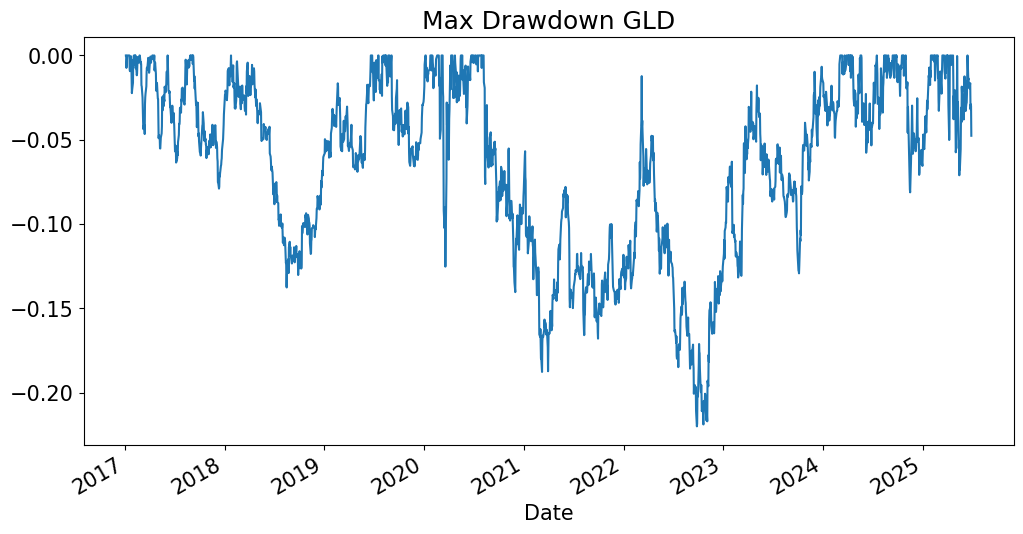

In [ ]:
TICK = 'GLD'

drawdown = mdd_timeseries(rets)
drawdown[TICK].plot(title=f'Max Drawdown {TICK}');
plt.show()

In [ ]:
tailMetrics(rets,relative=False)[['VaR (0.05)','CVaR (0.05)']].style.format('{:.2%}')

,VaR (0.05),CVaR (0.05)
SPY,-1.76%,-2.90%
VEA,-1.57%,-2.56%
UPRO,-5.28%,-8.70%
GLD,-1.44%,-2.04%
USO,-3.54%,-5.93%
FXE,-0.73%,-0.96%
BTC,-6.25%,-9.80%
HYG,-0.71%,-1.27%
IEF,-0.68%,-0.95%
TIP,-0.53%,-0.86%


In [ ]:
QUANT = .05

quants = rets.quantile(QUANT).to_frame()
quants.columns = [f'quantile {QUANT}']

quants.sort_values(quants.columns[0]).style.format('{:.1%}')

,quantile 0.05
BTC,-6.2%
UPRO,-5.3%
USO,-3.5%
SPY,-1.8%
VEA,-1.6%
GLD,-1.4%
FXE,-0.7%
HYG,-0.7%
IEF,-0.7%
TIP,-0.5%


#### Sampling error in mean

Given by LLN, diminishes with $\sqrt{N}$.

In [ ]:
mu = rets.mean()
se = rets.std()/np.sqrt(rets.shape[0])
ratio = mu/quants[f'quantile {QUANT}'].values
tab = pd.concat([mu,se,ratio],axis=1)
tab.columns = ['mean','standard error','mean as fraction of quantile']
tab.style.format('{:.2%}')

,mean,standard error,mean as fraction of quantile
SPY,0.06%,0.03%,-3.44%
VEA,0.04%,0.02%,-2.45%
UPRO,0.15%,0.08%,-2.92%
GLD,0.05%,0.02%,-3.55%
USO,0.02%,0.05%,-0.56%
FXE,0.01%,0.01%,-0.87%
BTC,0.31%,0.10%,-5.04%
HYG,0.02%,0.01%,-2.59%
IEF,0.00%,0.01%,-0.73%
TIP,0.01%,0.01%,-2.07%


***

# <span style="color:red">2</span>

In [ ]:
# LOADETF = '../data/risk_etf_data.xlsx'
# px = pd.read_excel(LOADETF,sheet_name='prices').set_index('Date').dropna()
# rets = px.pct_change().dropna()

In [ ]:
FREQ_LABEL = 'daily'
FREQ_LABEL_AGG = 'monthly'
CODE_RESAMPLE = 'ME'

px = (1+rets).cumprod()
retsM = px.resample(CODE_RESAMPLE).last().pct_change().dropna()
retsM.dropna(inplace=True)
#retsM.tail().style.format('{:.1%}').format_index('{:%Y-%m-%d}')

In [ ]:
keyX = 'SPY'
pd.concat([bivariate_risk(rets,keyX=keyX),bivariate_risk(retsM,keyX=keyX)],axis=1,keys=[FREQ_LABEL,'monthly']).style.format('{:.2%}')

In [ ]:
pd.concat([get_moments(rets,doStyle=False),get_moments(retsM,doStyle=False)],axis=1,keys=[FREQ_LABEL,FREQ_LABEL_AGG]).style.format('{:.2f}')